In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', palette = 'Paired')

In [2]:
metrics_full_time = np.load('dict_evaluation/metrics_full_time.npy',allow_pickle='TRUE').item()
metrics_reduced_time = np.load('dict_evaluation/metrics_reduced_time.npy',allow_pickle='TRUE').item()
metrics_full_random = np.load('dict_evaluation/metrics_full_random.npy',allow_pickle='TRUE').item()
metrics_reduced_random = np.load('dict_evaluation/metrics_reduced_random.npy',allow_pickle='TRUE').item()

In [3]:
full_time = pd.DataFrame.from_dict(metrics_full_time, orient='index').reset_index().rename(columns={0:'Train Accuracy', 
                                                                                        1:'Test Accuracy', 
                                                                                        2:'Test Precision',
                                                                                       3:'Test Recall',
                                                                                       4:'Test Confusion Matirx'})

In [4]:
reduced_time = pd.DataFrame.from_dict(metrics_reduced_time, orient='index').reset_index().rename(columns={0:'Train Accuracy', 
                                                                                        1:'Test Accuracy', 
                                                                                        2:'Test Precision',
                                                                                       3:'Test Recall',
                                                                                       4:'Test Confusion Matirx'})

In [5]:
full_random = pd.DataFrame.from_dict(metrics_full_random, orient='index').reset_index().rename(columns={0:'Train Accuracy', 
                                                                                        1:'Test Accuracy', 
                                                                                        2:'Test Precision',
                                                                                       3:'Test Recall',
                                                                                       4:'Test Confusion Matirx'})

In [6]:
reduced_random = pd.DataFrame.from_dict(metrics_reduced_random, orient='index').reset_index().rename(columns={0:'Train Accuracy', 
                                                                                        1:'Test Accuracy', 
                                                                                        2:'Test Precision',
                                                                                       3:'Test Recall',
                                                                                       4:'Test Confusion Matirx'})

In [7]:
full_random

,index,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Test Confusion Matirx
0,Logistic regression - Oversampling,0.841801,0.739247,0.841410,0.757937,"[[84, 36], [61, 191]]"
1,Logistic regression - Balanced Training,0.842956,0.752688,0.857143,0.761905,"[[88, 32], [60, 192]]"
2,Logistic regression - Balanced Training - CV,0.842956,0.752688,0.857143,0.761905,"[[88, 32], [60, 192]]"
3,Logistic regression - p=0.37,0.842956,0.752688,0.837945,0.841270,"[[88, 32], [60, 192]]"
4,Decision Tree - Oversampling,1.000000,0.836022,0.906383,0.845238,"[[98, 22], [39, 213]]"
5,Decision Tree - Balanced (max_depth=12),0.969977,0.852151,0.926407,0.849206,"[[103, 17], [38, 214]]"
6,Random Forest - Balanced (max_depth=12),0.991917,0.854839,0.909091,0.873016,"[[98, 22], [32, 220]]"
7,XGBoost - Balanced (max_depth=12),0.982659,0.860215,0.893701,0.900794,"[[93, 27], [25, 227]]"
8,GaussianNB - Oversampling,0.706697,0.623656,0.966667,0.460317,"[[116, 4], [136, 116]]"
9,SVM - Oversampling,0.906467,0.771505,0.871111,0.777778,"[[91, 29], [56, 196]]"


In [8]:
full_time_acc = full_time.sort_values(by=['Test Accuracy'], ascending=True)
reduced_time_acc = reduced_time.sort_values(by=['Test Accuracy'], ascending=True)
full_random_acc = full_random.sort_values(by=['Test Accuracy'], ascending=True)
reduced_random_acc = reduced_random.sort_values(by=['Test Accuracy'], ascending=True)

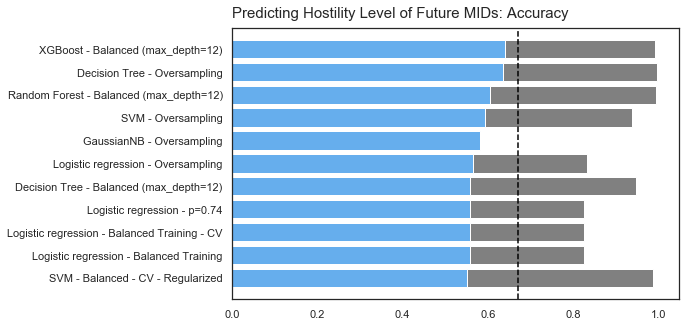

In [9]:
plt.figure(figsize=[8,5])
plt.barh(reduced_time_acc['index'], width=reduced_time_acc['Train Accuracy'], color='gray')
plt.barh(reduced_time_acc['index'], width=reduced_time_acc['Test Accuracy'], color='#66AEED')
plt.axvline(x=0.67, color = 'black', ls='--')
plt.title('Predicting Hostility Level of Future MIDs: Accuracy', loc='left', pad=10, fontsize=15);

/Users/elena/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  """


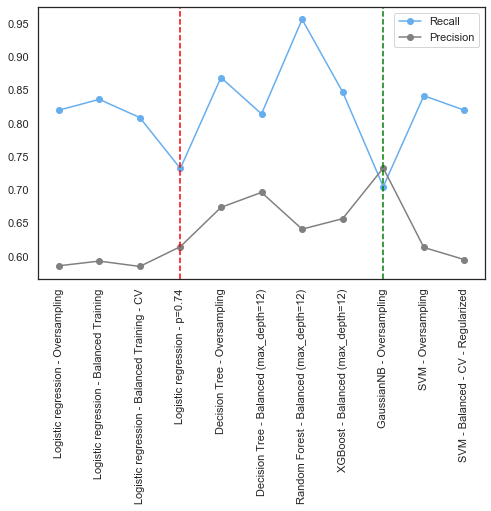

In [10]:
plt.figure(figsize=[8,5])
plt.plot(full_time['index'], full_time['Test Recall'], color='#66AEED', marker = 'o')
plt.plot(full_time['index'], full_time['Test Precision'], color='gray', marker = 'o')
plt.xticks(rotation=90)
plt.legend(np.arange(2), labels=['Recall', 'Precision'])
plt.axvline(x=3, color = 'red', ls='--')
plt.axvline(x=8, color = 'green', ls='--')

/Users/elena/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  """


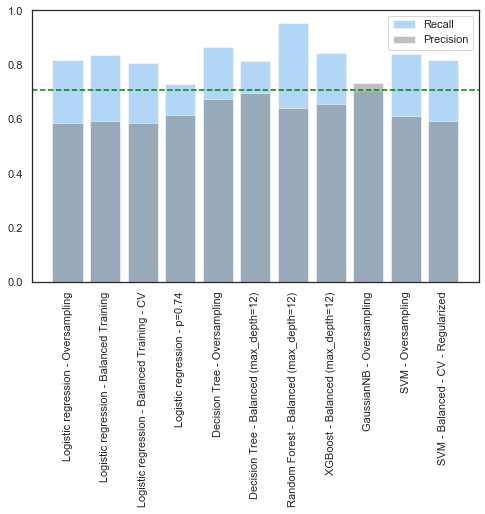

In [11]:
plt.figure(figsize=[8,5])
plt.bar(full_time['index'], full_time['Test Recall'], color='#66AEED', alpha=0.5)
plt.bar(full_time['index'], full_time['Test Precision'], color='gray', alpha=0.5)
plt.xticks(rotation=90)
plt.legend(np.arange(2), labels=['Recall', 'Precision'])
plt.axhline(y=0.71, color = 'green', ls='--');

/Users/elena/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  del sys.path[0]


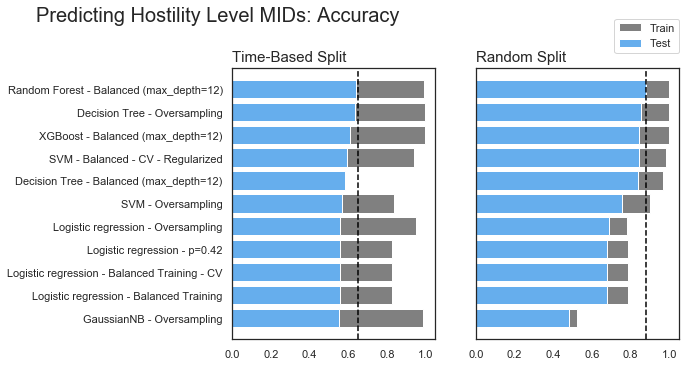

In [12]:
fig, ax = plt.subplots(1,2, sharex = False, sharey=True, figsize=[8,5])
plt.suptitle('Predicting Hostility Level MIDs: Accuracy',fontsize=20, x=0.1, y=1.05)

#Col1
ax[0].barh(reduced_time_acc['index'], width=reduced_time_acc['Train Accuracy'], color='gray')
ax[0].barh(reduced_time_acc['index'], width=reduced_time_acc['Test Accuracy'], color='#66AEED')
ax[0].axvline(x=0.65, color = 'black', ls='--')
ax[0].set_title('Time-Based Split', loc='left',  fontsize=15);

#Col2
ax[1].barh(reduced_random_acc['index'], width=reduced_random_acc['Train Accuracy'], color='gray')
ax[1].barh(reduced_random_acc['index'], width=reduced_random_acc['Test Accuracy'], color='#66AEED')
ax[1].legend(np.arange(2), labels=('Train', 'Test'), bbox_to_anchor=(1.03, 1.2))
ax[1].axvline(x=0.88, color = 'black', ls='--')
ax[1].set_title('Random Split', loc='left',  fontsize=15);

In [13]:
full_time_pr = full_time.sort_values(by=['Test Recall'], ascending=True)
reduced_time_pr = reduced_time.sort_values(by=['Test Recall'], ascending=True)
full_random_pr = full_random.sort_values(by=['Test Recall'], ascending=True)
reduced_random_pr = reduced_random.sort_values(by=['Test Recall'], ascending=True)

/Users/elena/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  from ipykernel import kernelapp as app


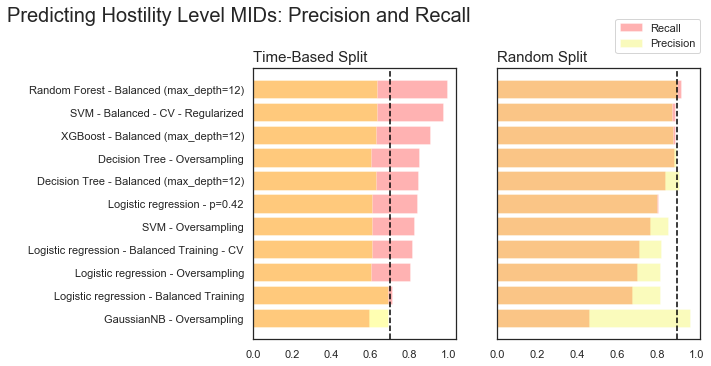

In [14]:
fig, ax = plt.subplots(1,2, sharex = False, sharey=True, figsize=[8,5])
plt.suptitle('Predicting Hostility Level MIDs: Precision and Recall',fontsize=20, x=0.1, y=1.05)

#Col1
ax[0].barh(reduced_time_pr['index'], width=reduced_time_pr['Test Recall'], color='red', alpha=0.3)
ax[0].barh(reduced_time_pr['index'], width=reduced_time_pr['Test Precision'], color='yellow', alpha=0.3)
ax[0].set_title('Time-Based Split', loc='left',  fontsize=15);
ax[0].axvline(x=0.7, color = 'black', ls='--')

#Col2
ax[1].barh(reduced_random_pr['index'], width=reduced_random_pr['Test Recall'], color='red', alpha=0.3)
ax[1].barh(reduced_random_pr['index'], width=reduced_random_pr['Test Precision'], color='#EFF222', alpha=0.3)

ax[1].set_title('Random Split', loc='left',  fontsize=15)
ax[1].legend(np.arange(2), labels=('Recall', 'Precision'), bbox_to_anchor=(1.03, 1.2))
ax[1].axvline(x=0.9, color = 'black', ls='--');